In [1]:
import sys, os
sys.path.insert(0, os.path.dirname(os.path.abspath('../desdeo_emo')))
%matplotlib notebook

In [2]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from desdeo_problem.Problem import DataProblem

from desdeo_problem.surrogatemodels.SurrogateModels import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from desdeo_problem.surrogatemodels.lipschitzian import LipschitzianRegressor

from desdeo_problem.testproblems.TestProblems import test_problem_builder
from pyDOE import lhs

from desdeo_emo.EAs.NSGAIII import NSGAIII
from desdeo_emo.EAs.RVEA import RVEA
from desdeo_emo.EAs.NSGAIII import NSGAIII

from pygmo import non_dominated_front_2d as nd2

In [3]:
problem_name = "ZDT1"
prob = test_problem_builder(problem_name)

In [4]:
x = lhs(30, 100)
y = prob.evaluate(x)

x_names = [f'x{i}' for i in range(1,31)]
y_names = ["f1", "f2"]

data = pd.DataFrame(np.hstack((x,y.objectives)), columns=x_names+y_names)

In [5]:
data_pareto = nd2(y.objectives)

In [6]:
y.objectives[data_pareto]

array([[1.48848975e-03, 5.38416568e+00],
       [2.33607675e-02, 4.67442347e+00],
       [8.02068552e-02, 4.47398149e+00],
       [1.00948625e-01, 4.31352333e+00],
       [1.36856701e-01, 4.25368678e+00],
       [1.67422720e-01, 3.41443303e+00],
       [1.78996777e-01, 3.34713199e+00],
       [4.69187443e-01, 3.31508107e+00],
       [5.33493933e-01, 2.93676256e+00],
       [8.19846581e-01, 2.69981114e+00],
       [8.32165468e-01, 2.65589883e+00]])

In [7]:
problem = DataProblem(data=data, variable_names=x_names, objective_names=y_names)

The following will work with RVEA in the exact same way

In [8]:
problem.train(LipschitzianRegressor)
evolver_L_opt = NSGAIII(problem, use_surrogates=True, selection_type="optimistic")
while evolver_L_opt.continue_evolution():
    evolver_L_opt.iterate()
    
evolver_L = NSGAIII(problem, use_surrogates=True)
while evolver_L.continue_evolution():
    evolver_L.iterate()
    
evolver_L_robust = NSGAIII(problem, use_surrogates=True, selection_type="robust")
while evolver_L_robust.continue_evolution():
    evolver_L_robust.iterate()

In [9]:
problem.train(GaussianProcessRegressor, {"kernel": Matern(nu=3/2)})
evolver_G_opt = NSGAIII(problem, use_surrogates=True, selection_type="optimistic")
while evolver_G_opt.continue_evolution():
    evolver_G_opt.iterate()
    
evolver_G = NSGAIII(problem, use_surrogates=True)
while evolver_G.continue_evolution():
    evolver_G.iterate()
    
evolver_G_robust = NSGAIII(problem, use_surrogates=True, selection_type="robust")
while evolver_G_robust.continue_evolution():
    evolver_G_robust.iterate()

In [10]:
evolver_true = NSGAIII(prob)
while evolver_true.continue_evolution():
    evolver_true.iterate()

In [15]:
front_true = evolver_true.population.objectives
front_L = evolver_L.population.objectives
front_G = evolver_G.population.objectives
front_L_opt = evolver_L_opt.population.objectives - evolver_L_opt.population.uncertainity
front_G_opt = evolver_G_opt.population.objectives - evolver_G_opt.population.uncertainity
front_L_robust = evolver_L_robust.population.objectives + evolver_L_robust.population.uncertainity
front_G_robust = evolver_G_robust.population.objectives + evolver_G_robust.population.uncertainity

<IPython.core.display.Javascript object>


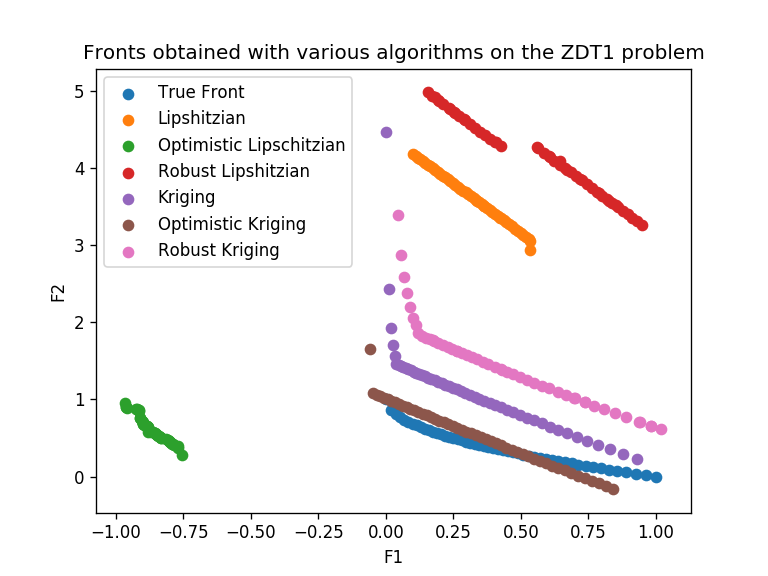

In [16]:
true = plt.scatter(x=front_true[:,0], y=front_true[:,1], label="True Front")
L = plt.scatter(x=front_L[:,0], y=front_L[:,1], label="Lipshitzian")
L_opt = plt.scatter(x=front_L_opt[:,0], y=front_L_opt[:,1], label="Optimistic Lipschitzian")
L_robust = plt.scatter(x=front_L_robust[:,0], y=front_L_robust[:,1], label="Robust Lipshitzian")
G = plt.scatter(x=front_G[:,0], y=front_G[:,1], label="Kriging")
G_opt = plt.scatter(x=front_G_opt[:,0], y=front_G_opt[:,1], label="Optimistic Kriging")
G_robust = plt.scatter(x=front_G_robust[:,0], y=front_G_robust[:,1], label="Robust Kriging")
plt.title(f"Fronts obtained with various algorithms on the {problem_name} problem")
plt.xlabel("F1")
plt.ylabel("F2")
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.tight_layout()

In [13]:
front_true = evolver_true.population.objectives
front_L = prob.evaluate(evolver_L.population.individuals).objectives
front_G = prob.evaluate(evolver_G.population.individuals).objectives
front_L_opt = prob.evaluate(evolver_L_opt.population.individuals).objectives
front_G_opt = prob.evaluate(evolver_G_opt.population.individuals).objectives
front_L_robust = prob.evaluate(evolver_L_robust.population.individuals).objectives
front_G_robust = prob.evaluate(evolver_G_robust.population.individuals).objectives